## Refactor `9ShotTimes.py`

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib

def load_data(file_path):
    """Load JSON data from file and return as a pandas DataFrame."""
    with open(file_path) as f:
        data = json.load(f)
    return pd.DataFrame(data)

def identify_goals(shots_df):
    """Identify shots that resulted in goals and return updated DataFrame."""
    # Vectorized operation to identify goals
    shots_df['Goal'] = shots_df['tags'].apply(lambda tags: 1 if any(tag['id'] == 101 for tag in tags) else 0)
    return shots_df

def filter_shots(shots_df, half, is_goal):
    """Filter shots based on match half and whether it was a goal."""
    condition = (shots_df['matchPeriod'] == half)
    if is_goal:
        condition = condition & (shots_df['Goal'] == 1)
    return shots_df[condition]['eventSec']

def calculate_statistics(shots_df, total_shots):
    """Calculate and print basic shot statistics."""
    number_of_matches = len(np.unique(shots_df['matchId']))
    shots_per_match = total_shots / number_of_matches
    shots_per_min = total_shots / 48  # Assuming 48 minutes per half
    print(f"Total shots: {total_shots}, Shots per match: {shots_per_match:.2f}, Shots per minute: {shots_per_min:.2f}")

def plot_shots(shots_times, half, is_goal):
    """Plot histogram of shots or goals."""
    # Configure plot aesthetics
    plt.figure(figsize=(12 / 2.54, 8 / 2.54))
    plt.hist(shots_times / 60, bins=range(0, 49))  # Convert seconds to minutes
    plt.xlabel('Time elapsed in ' + half[0] + ' half (minutes)')
    ylabel = 'Number of goals over the season' if is_goal else 'Number of shots over the season'
    plt.ylabel(ylabel)
    plt.title(f"Distribution of {'Goals' if is_goal else 'Shots'} in the {half}")
    plt.grid(axis='y')

    plt.show()

def save_figure(fig, half, is_goal):
    """Save the figure to a PDF file."""
    filename = f'Output/TimesOf{"Goals" if is_goal else "Shots"}{half}.pdf'
    fig.savefig(filename, dpi=None, bbox_inches="tight")

Total shots: 3124, Shots per match: 10.21, Shots per minute: 65.08


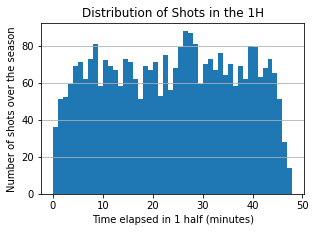

In [3]:
# Load the Wyscout data
data_df = load_data('wyscout/events/events_Germany.json')

# Filter out shots from the events data and identify goals
shots = data_df[data_df['subEventName'] == 'Shot'].copy()
shots = identify_goals(shots)

# Define variables for analysis
half = '1H'
is_goal = 0  # 0 for shots, 1 for goals

# Filter shots based on the half and goal condition
the_shots = filter_shots(shots, half, is_goal)

# Calculate and print basic statistics
calculate_statistics(shots, len(the_shots))

# Plot the shots or goals
plot_shots(the_shots, half, is_goal)